#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

#### Load the data

In [2]:
data = pd.read_csv('3.01.Country-clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


#### Map the data

In [3]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2}) # This is not the optimal way to encode them, but iw will work for now
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [4]:
x = data_mapped.iloc[:, 3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


#### Clustering

In [5]:
kmeans = KMeans(2)

In [6]:
kmeans.fit(x)

KMeans(n_clusters=2)

#### Clustering results

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 1, 0, 1], dtype=int32)

In [8]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


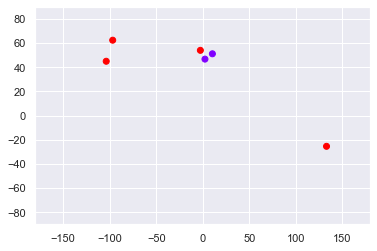

In [9]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show() # clustering by language

#### Selecting the number of clusters

#### WCSS (With-in Clusters Some of Squares)

In [10]:
kmeans.inertia_

0.5

In [11]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """
/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  """


In [12]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

#### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

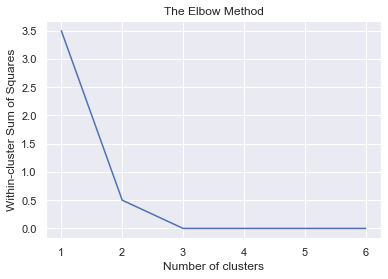

In [13]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')